Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [2]:
df = pd.read_csv ("/Users/ASUS/Downloads/Data/Online_Retail_Data_Set.csv", encoding='latin1')
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))
df.head()

Dataset berisi 541909 baris dan 8 kolom (atribut)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Melihat informasi kolom, baris, dan data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Mengecek missing value dengan [.isnull()]() serta menjumlahkannya dengan menambah [.sum]()

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Terdapat 1454 missing value pada description dan 135080 pada CustomerID

Melihat banyaknya unique values untuk tiap atribut.

In [5]:
for col in df.columns:
    print(col,': ', df[col].nunique())

InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38


## **Data Cleaning**

cek missing value Description

In [6]:
df['Description'].isnull().sum()

1454

In [7]:
print(df['Description'].isnull().sum()/df.shape[0] * 100, '%')

0.2683107311375157 %


Terdapat 1454 baris yang merupakan missing value. Terdapat 0.27% merupakan missing values dari keseluruhan dataset pada atribut Description. Perlu dilakukan penanganan terhadap missing value ini.

Selanjutnya penanganan missing values dengan menghapus baris yang merupakan missing value menggunakan .drop

In [8]:
df2 = df.drop(df[df['Description'].isnull()].index)

df.shape, df2.shape

((541909, 8), (540455, 8))

Cek missing value, untuk memastikan bahwa tidak ada lagi missing value

In [9]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

Masih ada missing value pada CustomerID

In [10]:
print(df2['CustomerID'].isnull().sum()/df.shape[0] * 100, '%')

24.658383603151083 %


Terdapat 133626 baris yang merupakan missing value. Terdapat 24.66% merupakan missing values dari keseluruhan dataset pada atribut Description. Perlu dilakukan penanganan terhadap missing value ini.

Selanjutnya penanganan missing values dengan menghapus baris yang merupakan missing value menggunakan .drop

In [11]:
df3 = df2.drop(df2[df['CustomerID'].isnull()].index)

df2.shape, df3.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15412\2571703217.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2.drop(df2[df['CustomerID'].isnull()].index)


((540455, 8), (406829, 8))

cek lagi missing value

In [12]:
df3.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
# konversi kolom InvoiceNo ke tipe data string
df3['InvoiceNo'] = df3['InvoiceNo'].astype(str)

In [15]:
# Menghapus semua baris dengan Invoice Numbers yang dimulai dengan "C"
# str.startswith('C') untuk memeriksa apakah Invoice Numbers dimulai dengan "C"
# ~ untuk mengambil kebalikannya, yaitu semua baris kecuali yang memiliki Invoice Numbers yang dimulai dengan "C".
df = df3[~df3['InvoiceNo'].str.startswith('C')]

In [16]:
# Menggunakan metode str.startswith() untuk memeriksa Invoice Numbers yang dimulai dengan "C"
canceled_invoices = df[df['InvoiceNo'].str.startswith('C')]

# Menampilkan hasil transaksi yang dibatalkan
print(canceled_invoices)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [17]:
len(df)

397924

# **Eksplorasi Data**

Melihat statistik descriptif pada data numerik

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Distribusi 10 negara teratas

In [20]:
negara = df["Country"].value_counts().head(10)
negara

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: Country, dtype: int64

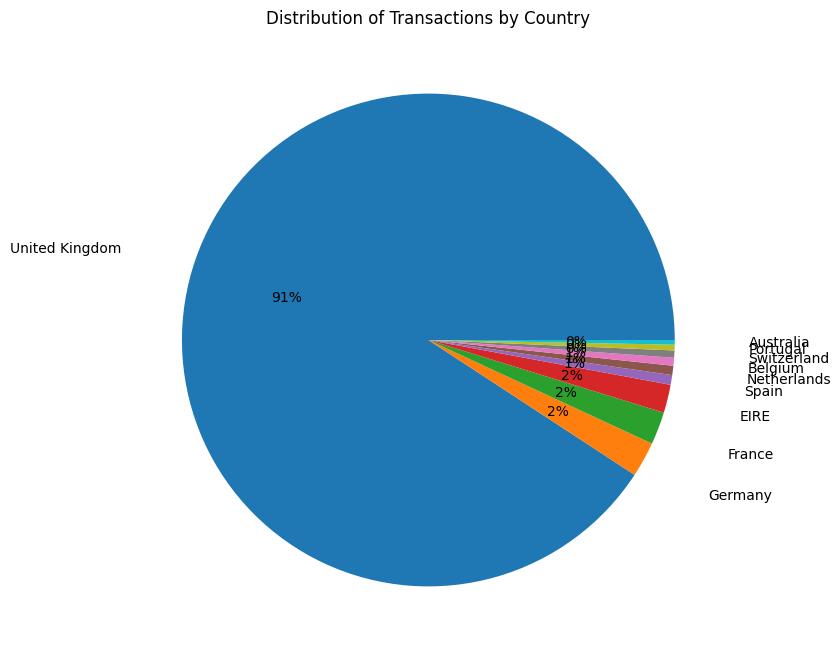

In [21]:
# visualisasi dengan pie chart

plt.figure(figsize=[8,8])
plt.pie(negara,labels=negara.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Distribution of Transactions by Country")
plt.show()

## Tren penjualan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15412\2613391177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


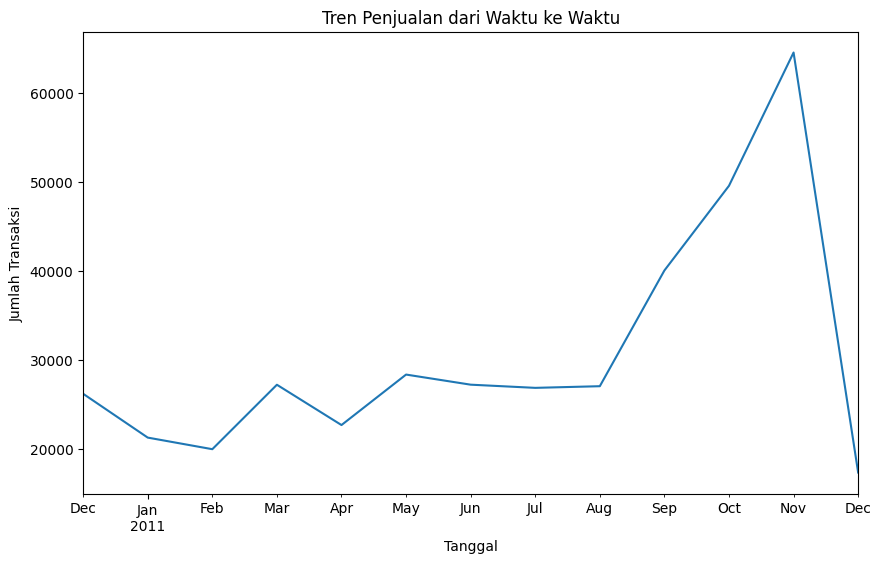

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
plt.figure(figsize=(10, 6))
df.groupby(pd.Grouper(key='InvoiceDate', freq='M')).size().plot()
plt.title('Tren Penjualan dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.show()

## Penjualan di 2011

In [23]:
# Filter data hanya untuk tahun 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

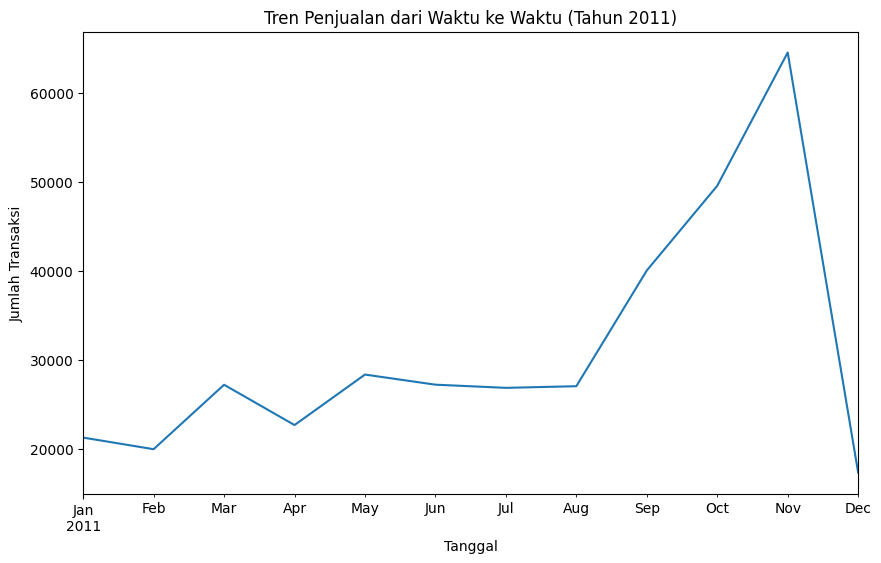

In [24]:
# Visualisasikan tren penjualan hanya untuk tahun 2011

plt.figure(figsize=(10, 6))
df_2011.groupby(pd.Grouper(key='InvoiceDate', freq='M')).size().plot()
plt.title('Tren Penjualan dari Waktu ke Waktu (Tahun 2011)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.show()

## Total penjualan produk

In [25]:
# : Hitung total penjualan setiap produk

product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

product_sales

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,140
1,50'S CHRISTMAS GIFT BAG LARGE,1885
2,DOLLY GIRL BEAKER,2398
3,I LOVE LONDON MINI BACKPACK,360
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,4894
3873,ZINC TOP 2 DOOR WOODEN SHELF,10
3874,ZINC WILLIE WINKIE CANDLE STICK,2607
3875,ZINC WIRE KITCHEN ORGANISER,25


In [26]:
# Ambil hanya 10 produk teratas

top_10_products = product_sales.nlargest(10, 'Quantity')

top_10_products


,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2269,PACK OF 72 RETROSPOT CAKE CASES,33693
2600,POPCORN HOLDER,30931
2656,RABBIT NIGHT LIGHT,27202
2047,MINI PAINT SET VINTAGE,26076


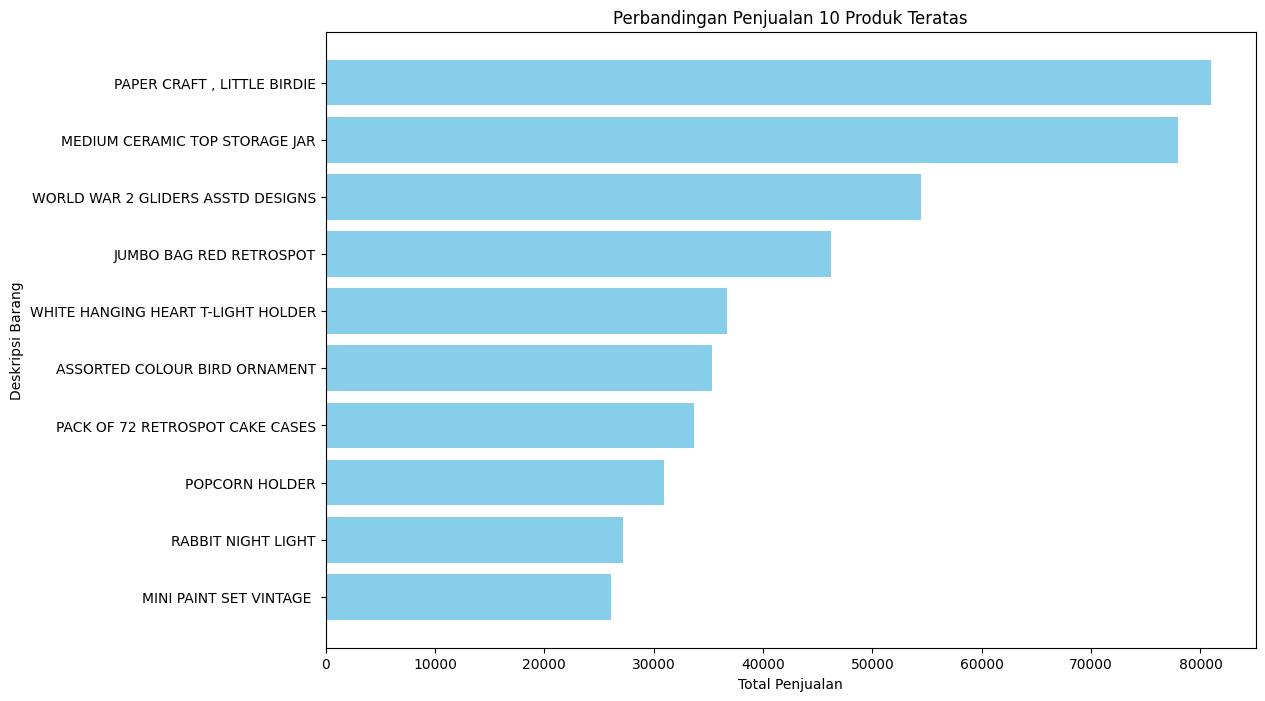

In [27]:
# Visualisasikan hasilnya dengan bar plot

plt.figure(figsize=(12, 8))
plt.barh(top_10_products['Description'], top_10_products['Quantity'], color='skyblue')
plt.xlabel('Total Penjualan')
plt.ylabel('Deskripsi Barang')
plt.title('Perbandingan Penjualan 10 Produk Teratas')
plt.gca().invert_yaxis()  # Membalik urutan barang agar yang terjual terbanyak berada di bagian atas
plt.show()

## Produk terfavorit

In [28]:
favorite_products_per_customer = df.groupby(['CustomerID', 'Description']).size().groupby('CustomerID').idxmax().apply(lambda x: x[1])

print(favorite_products_per_customer)

CustomerID
12346.0        MEDIUM CERAMIC TOP STORAGE JAR
12347.0     AIRLINE BAG VINTAGE JET SET BROWN
12348.0                               POSTAGE
12349.0    16 PIECE CUTLERY SET PANTRY DESIGN
12350.0           4 TRADITIONAL SPINNING TOPS
                          ...                
18280.0        ALARM CLOCK BAKELIKE CHOCOLATE
18281.0                SPACEBOY BABY GIFT SET
18282.0        ANTIQUE CREAM CUTLERY CUPBOARD
18283.0             CHARLOTTE BAG SUKI DESIGN
18287.0    S/4 IVORY MINI ROSE CANDLE IN BOWL
Length: 4339, dtype: object


In [29]:
# Ambil hanya 10 produk favorit teratas

top_10_favorite_products = favorite_products_per_customer.value_counts().head(10)

top_10_favorite_products

ASSORTED COLOUR BIRD ORNAMENT         139
POSTAGE                               117
ANTIQUE SILVER T-LIGHT GLASS           54
6 RIBBONS RUSTIC CHARM                 53
WHITE HANGING HEART T-LIGHT HOLDER     52
JUMBO BAG RED RETROSPOT                51
BAKING SET 9 PIECE RETROSPOT           50
ALARM CLOCK BAKELIKE GREEN             40
CHOCOLATE HOT WATER BOTTLE             38
PARTY BUNTING                          37
dtype: int64

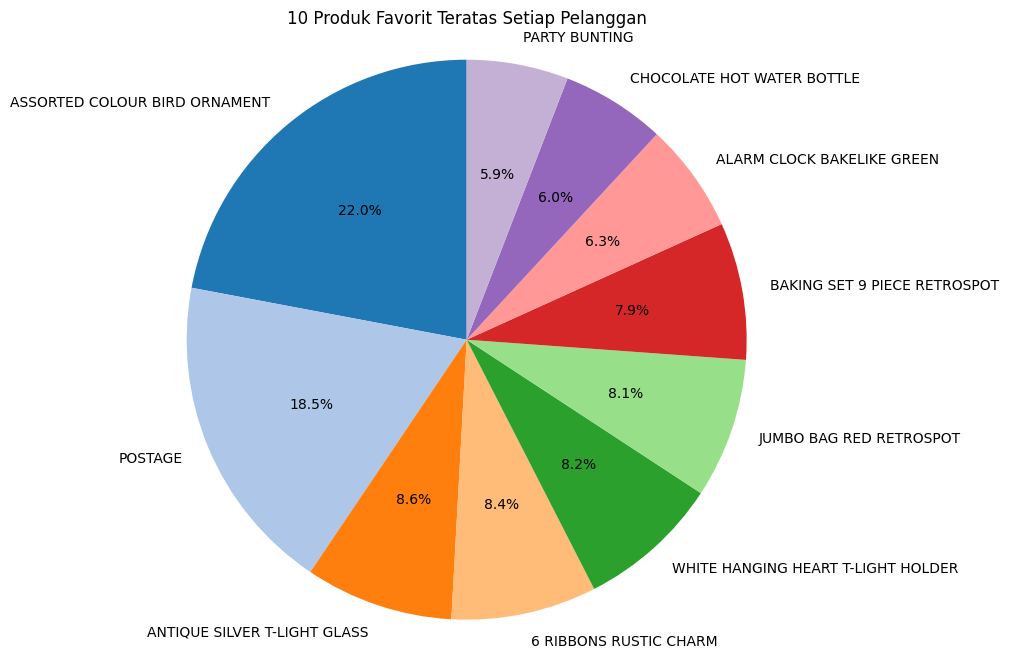

In [30]:
# Visualisasi dengan pie chart

plt.figure(figsize=(10, 8))
top_10_favorite_products.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('10 Produk Favorit Teratas Setiap Pelanggan')
plt.ylabel('')
plt.axis('equal')
plt.show()

# **Analisis Asosiasi**

Analisis Asosiasi untuk produk terfavorit

In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Ubah data ke dalam format transaksi
transactions = df.groupby('CustomerID')['Description'].apply(list)

transactions

CustomerID
12346.0                     [MEDIUM CERAMIC TOP STORAGE JAR]
12347.0    [BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ...
12348.0    [72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASES...
12349.0    [PARISIENNE CURIO CABINET, SWEETHEART WALL TID...
12350.0    [CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NEI...
                                 ...                        
18280.0    [WOOD BLACK BOARD ANT WHITE FINISH, RETROSPOT ...
18281.0    [ROBOT BIRTHDAY CARD, CARD CIRCUS PARADE, PENN...
18282.0    [ANTIQUE CREAM CUTLERY CUPBOARD, FRENCH STYLE ...
18283.0    [CHARLOTTE BAG PINK POLKADOT, LUNCH BAG WOODLA...
18287.0    [SMALL PURPLE BABUSHKA NOTEBOOK , SMALL RED BA...
Name: Description, Length: 4339, dtype: object

In [32]:
# Buat DataFrame dengan format one-hot encoding
one_hot_encoded_df = transactions.str.join('|').str.get_dummies()

one_hot_encoded_df

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Terapkan algoritma Apriori untuk mendapatkan itemset yang sering muncul bersama
frequent_itemsets = apriori(one_hot_encoded_df, min_support=0.05, use_colnames=True)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [34]:
# Terapkan association rules untuk menemukan aturan asosiasi yang kuat
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [35]:
# Tampilkan aturan asosiasi yang relevan
print(rules)

                                           antecedents  \
0                        (60 TEATIME FAIRY CAKE CASES)   
1                    (PACK OF 72 RETROSPOT CAKE CASES)   
2                         (ALARM CLOCK BAKELIKE GREEN)   
3                          (ALARM CLOCK BAKELIKE RED )   
4                          (ALARM CLOCK BAKELIKE PINK)   
..                                                 ...   
217  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   
218                   (PINK REGENCY TEACUP AND SAUCER)   
219                 (ROSES REGENCY TEACUP AND SAUCER )   
220                         (REGENCY CAKESTAND 3 TIER)   
221                  (GREEN REGENCY TEACUP AND SAUCER)   

                                           consequents  antecedent support  \
0                    (PACK OF 72 RETROSPOT CAKE CASES)            0.095414   
1                        (60 TEATIME FAIRY CAKE CASES)            0.146347   
2                          (ALARM CLOCK BAKELIKE RED )            0.0

**Kesimpulan yang dapat ditarik dari output ini adalah:**

- Terdapat 222 aturan asosiasi yang ditemukan dalam analisis.
- Aturan-aturan ini memiliki confidence yang relatif tinggi, dengan beberapa aturan memiliki confidence di atas 0.5.
- Lift dari aturan-asosiasi menunjukkan bahwa ada hubungan yang kuat antara antecedents dan consequents, yang menunjukkan pola pembelian yang teratur.
- Beberapa aturan memiliki nilai leverage yang signifikan, menunjukkan bahwa pembelian bersama item-item tersebut tidak hanya terjadi secara kebetulan.
- Conviction juga menunjukkan bahwa item-item consequent sangat dipengaruhi oleh keberadaan item antecedent.
- Zhang's metric memberikan informasi tambahan tentang kualitas aturan asosiasi, dengan nilai yang mendekati 1 menunjukkan aturan yang baik.

**Insight yang dapat digunakan untuk mengembangkan strategi pemasaran berdasarkan hasil Analisis Asosiasi:**

- Pemaketan Produk: Berdasarkan aturan asosiasi yang ditemukan, dapat mempertimbangkan untuk menggabungkan atau memaketkan produk-produk yang sering dibeli bersama-sama. Misalnya, jika ada aturan yang menunjukkan bahwa pelanggan yang membeli "ALARM CLOCK BAKELIKE RED" cenderung juga membeli "ALARM CLOCK BAKELIKE GREEN", dapat mempertimbangkan untuk menjual keduanya sebagai paket atau bundel dengan harga yang lebih menarik.

- Promosi Silang: Dapat menggunakan aturan asosiasi untuk mengarahkan promosi silang antara produk-produk yang memiliki hubungan yang kuat. Misalnya, jika ada aturan yang menunjukkan bahwa pelanggan yang membeli "60 TEATIME FAIRY CAKE CASES" juga cenderung membeli "PACK OF 72 RETROSPOT CAKE CASES", dapat mengatur promosi khusus di mana pelanggan yang membeli salah satu produk akan mendapatkan diskon untuk pembelian produk lainnya.

- Penempatan Produk: Analisis ini juga dapat membantu dalam penempatan produk di dalam toko fisik atau online.  dapat menempatkan produk-produk yang memiliki hubungan yang kuat secara bersama-sama atau dekat satu sama lain di dalam toko untuk mendorong pembelian yang lebih tinggi.

- Rekomendasi Produk: Dengan memahami pola pembelian pelanggan, dapat meningkatkan sistem rekomendasi produk di platform e-commerce. Jika seorang pelanggan telah membeli salah satu produk yang terkait dengan aturan asosiasi tertentu, Anda dapat merekomendasikan produk lain dalam aturan tersebut.

- Kampanye Cross-Selling: Berdasarkan aturan asosiasi, dapat merancang kampanye cross-selling yang ditargetkan. dapat mengirimkan promosi atau penawaran khusus kepada pelanggan yang telah membeli salah satu produk dalam aturan asosiasi, mendorong mereka untuk membeli produk tambahan yang terkait.